In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
vid = pd.read_excel("C:/Users/brook/Documents/MSDS/MSDS 422/Module 1/COVID-19-geographic-disbtribution-worldwide-2020-12-14.xlsx")

In [4]:
vid.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


In [5]:
vid.describe()

,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,61900.000000,61900.000000,61900.000000,61900.000000,61900.000000,6.177700e+04,59021.000000
mean,15.628934,7.067157,2019.998918,1155.147237,26.055460,4.098770e+07,66.320586
std,8.841582,2.954776,0.032882,6779.224479,131.227055,1.531294e+08,162.329240
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,8.150000e+02,-147.419587
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.293120e+06,0.757526
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,7.169456e+06,6.724045
75%,23.000000,10.000000,2020.000000,273.000000,4.000000,2.851583e+07,52.572719
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1.433784e+09,1900.836210


In [6]:
vid['continentExp'].unique()

array(['Asia', 'Europe', 'Africa', 'America', 'Oceania', 'Other'],
      dtype=object)

In [7]:
vid_death = vid.groupby("day").agg({"deaths":"sum"})

vid_death = vid_death.reset_index()

ved_death = vid_death.set_index('day')

vid_death.tail()

,day,deaths
26,27,47084
27,28,50532
28,29,50196
29,30,51344
30,31,25522


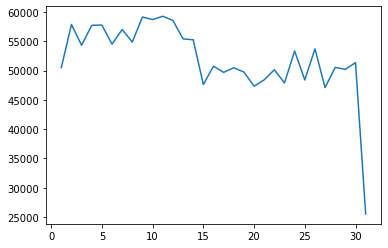

In [8]:
plt.plot(vid_death['day'],vid_death['deaths'])

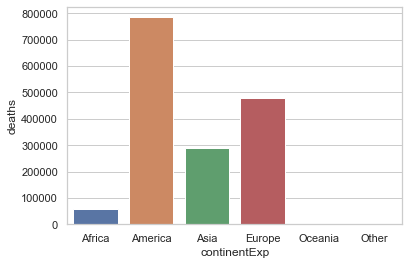

In [9]:
vid_country = vid.groupby("continentExp").agg({"deaths":"sum"})

vid_country = vid_country.reset_index()

# ved_death = vid_death.set_index('day')

vid_country.tail()

sns.set_theme(style="whitegrid")

ax = sns.barplot(x="continentExp", y="deaths", data=vid_country)

In [10]:
vid_asian = vid[vid['continentExp'] == "Asia"]
vid_america = vid[vid['continentExp'] == "America"]
vid_europe = vid[vid['continentExp'] == "Europe"]
vid_oceania = vid[vid['continentExp'] == "Oceania"]
bvid_other = vid[vid['continentExp'] == "Other"]


In [19]:
vid_asian = vid[vid['continentExp'] == "Asia"]

vid_asian = vid_asian.groupby("day").agg({"deaths":"sum", "cases":"sum", "popData2019":"first"})
vid_asian = vid_asian.reset_index()

vid_america = vid[vid['continentExp'] == "America"]
vid_europe = vid[vid['continentExp'] == "Europe"]
vid_oceania = vid[vid['continentExp'] == "Oceania"]
bvid_other = vid[vid['continentExp'] == "Other"]

SyntaxError: invalid syntax (<ipython-input-19-d464a26814c0>, line 3)

In [20]:

vid_copy = vid.groupby(["day", "continentExp"]).agg({"cases":"sum", "deaths":"sum", "popData2019":"first"})


In [21]:
vid_copy['log_case']=np.log(vid_copy['cases'])
vid_copy = vid_copy.reset_index()
# test_stationarity(df1['log_Spend'].diff(1).dropna())

C:\Users\brook\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\brook\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


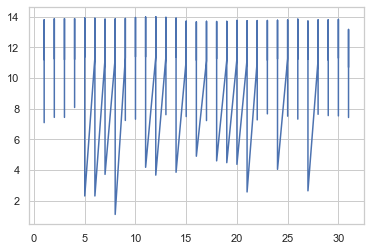

In [22]:
plt.plot(vid_copy['day'],vid_copy['log_case'])

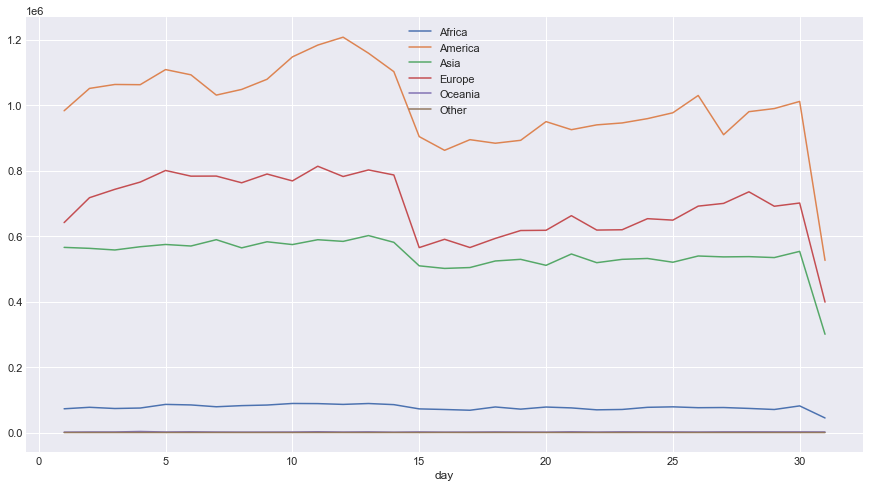

In [41]:
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
fig, ax = plt.subplots()
for label, grp in vid_copy.groupby('continentExp'):
    grp.plot(x = 'day', y = 'cases',ax = ax, label = label,figsize=(15,8))
    
